# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Описание данных:

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя


<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Предобработка-данных-для-целей-машинного-обучения" data-toc-modified-id="Предобработка-данных-для-целей-машинного-обучения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных для целей машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Предобработка-временных-признаков" data-toc-modified-id="Предобработка-временных-признаков-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Предобработка временных признаков</a></span></li><li><span><a href="#Предобработка-количественных-признаков" data-toc-modified-id="Предобработка-количественных-признаков-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Предобработка количественных признаков</a></span></li><li><span><a href="#Предобработка-категориальных-признаков" data-toc-modified-id="Предобработка-категориальных-признаков-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Предобработка категориальных признаков</a></span></li><li><span><a href="#Нормирование-количественных-признаков" data-toc-modified-id="Нормирование-количественных-признаков-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Нормирование количественных признаков</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-градиентного-бустинга-LightGBM" data-toc-modified-id="Модель-градиентного-бустинга-LightGBM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель градиентного бустинга LightGBM</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Анализ-качества" data-toc-modified-id="Анализ-качества-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ качества</a></span></li><li><span><a href="#Анализ-скорости-работы" data-toc-modified-id="Анализ-скорости-работы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ скорости работы</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li></ul></div>

## Подготовка данных

In [100]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

pd.options.mode.chained_assignment = None

In [101]:
#conda install lightgbm

Откроем и изучим данные:

In [102]:
data = pd.read_csv('datasets/autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Наблюдаем 354369 объектов и 16 признаков. Некоторые из признаков имеют большое количество пропусков, с которыми нам предстоит разобраться. Посмотрим детальнее на каждый признак с пропусками, и разработаем план обработки данных:

Отсеим признаки имеющие пропуски:

In [104]:
data.loc[data['Model'].isna(), 'Model']

1         NaN
59        NaN
81        NaN
115       NaN
135       NaN
         ... 
354245    NaN
354321    NaN
354338    NaN
354351    NaN
354365    NaN
Name: Model, Length: 19705, dtype: object

In [105]:
features_with_loses = []

for i in data:
    if data[i].count() < data.shape[0]:
        features_with_loses.append(i)
        
features_with_loses

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']

Т.о. имеем целых 5 признаков имеющих пропуски. 

Посмотрим на общее количество объектов имещих хотя бы 1 пропуск какого - либо признака:

In [106]:
print('Количество объектов имеющих хотя-бы 1 пропуск признака:', data.loc[:, :].isna().any(axis=1).sum())

Количество объектов имеющих хотя-бы 1 пропуск признака: 108555


Практически 30% всех имеющихся данных. Достаточно много, чтобы просто отбросить. Но мы знаем, что некоторые из впоследствии используемых нами алгоритмов не умеют обучаться на данных с пропусками. Поэтому, подумаем как от них избавиться.

In [107]:
data['NotRepaired'].value_counts(dropna=False)

no     247161
NaN     71154
yes     36054
Name: NotRepaired, dtype: int64

Вероятнее всего, большая часть пропусков здесь не просто так. Скорее всего, люди намеренно не раскрывают эту информацию, чтобы не отталкивать клиентов. Поэтому, заменим пропущеные значения на 'yes'.

In [108]:
data['NotRepaired'] = data['NotRepaired'].fillna('yes')

In [109]:
data['NotRepaired'].value_counts(dropna=False)

no     247161
yes    107208
Name: NotRepaired, dtype: int64

С этим разобрались. Посмотрим на столбец 'FuelType':

In [110]:
data['FuelType'].value_counts(dropna=False)

petrol      216352
gasoline     98720
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Мы видим, что львиная доля ~ 90% рынка занимают два вида топлива 'petrol' и 'gasoline'. Оказывается, что два этих понятия обозначают одно и то же - бензин. Просто 'petrol' - европейский термин а 'gasoline' - американский. Тем самым, можно даже определить страну, где продается автомобиль. 
Т.к. причины отсутствия информации о типе топлива неочевидны, вероятно, мы не сильно исказим датафрейм, если заполним имеющиеся пропуски на 'petrol'.

In [111]:
data['FuelType'] = data['FuelType'].fillna('petrol')
data['FuelType'].isna().sum() 

0

**Обработка столбца Gearbox**

In [112]:
data['Gearbox'].value_counts(dropna=False)

manual    268251
auto       66285
NaN        19833
Name: Gearbox, dtype: int64

In [113]:
data.loc[data['Gearbox'].isna()].head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,yes,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,yes,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,0,44145,2016-03-17 18:17:43


Какой-либо четкой информации, которая бы помогла определить тип коробки передач у нас нет. Поэтому, следует решить, заполнить пропуски или отбросить 19тыс. объектов? 19тыс. - это большая часть данных. Около **5%** от общего количества объектов. При этом, тип коробки передач - немаловажный параметр влияющий на цену. 

**75%** рынка занято автомобилями с механическими КПП. Автоматам принадлежит доля всего в **19%**. Какой-либо закономерности в пропусках мне найти не удалось, поэтому, будем считать пропуски **абсолютно случайными**. Тогда, заполнив пропуски 'manual'ом - мы ошибемся на ~ 3700 объектах (~1% от общего объема данных). Считаю это не критический ошибкой, и "меньшим злом", в сравнении с отбрасыванием 19тыс. объектов. 

In [114]:
data['Gearbox'] = data['Gearbox'].fillna('manual')
data['Gearbox'].isna().sum()

0

Осталось обработать столбцы 'VehicleType' и 'Model'

**Обработка столбца VehicleType**

In [115]:
data.loc[data['Model'].isna(), 'Model']

1         NaN
59        NaN
81        NaN
115       NaN
135       NaN
         ... 
354245    NaN
354321    NaN
354338    NaN
354351    NaN
354365    NaN
Name: Model, Length: 19705, dtype: object

In [116]:
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79831
wagon          65166
NaN            37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Здесь данные очевидно имеют бОльший разброс. **Явной доминанты нет**. Поэтому, заполнив пропуски наиболее часто встречающимся значением *sedan* получим ошибку на ~ **28тыс. объектов** (~8% от общего числа объектов) при условии, что пропуски абсолютно случайны. Уверенности в том, что такая замена принесет больше полезной информации, нежели лишнего шума у меня нет. 

Здесь стоит порассуждать на тему того, "*насколько вообще тип кузова влияет на цену?*" В рамках одной и той же модели, цена, на самом деле, будет практически одинаковой. Потому что, железо под капотом будет то же самое. Комплектация салона тоже +- одинакова. Поэтому большого разброса в цене мы не увидим. При этом, эта мысль поможет сохранить около 30 тыс. объектов! Попробуем заполнить пропуски в типе кузова - самым популярным значением в рамках модели: 

Запишем в отдельный словарик самый популярный тип кузова для каждой модели:

In [117]:
data_wout_type = data.loc[(~data['Model'].isna()) & (data['VehicleType'].isna())]

In [118]:
dictionary = dict()
for model in data_wout_type['Model']:  
    if model not in dictionary:
        try:
            dictionary[model] = mode(data.loc[data['Model'] == model]['VehicleType'])[0][0]
        except:
            dictionary[model] = 'HaveNoType'
        
#print(dictionary)

Теперь напишем крохотную функцию, которая будет дергать значение типа кузова соответствующее конкретной модели из словаря:

In [119]:
def fill_na(row, dictionary):
    return dictionary[row['Model']]

Наконец, заполним пропуски в столбце **VehicleType**:

In [120]:
data_wout_type['VehicleType'] = data_wout_type.apply(fill_na, dictionary=dictionary, axis=1)

In [121]:
data_wout_type = data_wout_type.loc[data_wout_type['VehicleType'] != 'HaveNoType']

Отбросим данные с пропусками в **'VehicleType'** из исходного датафрейма:

In [122]:
data = data.loc[~data['VehicleType'].isna()]

Cконкатенируем две таблицы:

In [123]:
data = pd.concat([data, data_wout_type])
data.shape

(347541, 16)

In [124]:
data['VehicleType'].isna().sum()

0

**Предобработка столбца 'Model'**

Считаем количество объектов без указания модели:

In [125]:
data['Model'].isna().sum()

12877

Модель - является одним из определяющих параметров формирующих цену автомобиля. Восстановить модель автомобиля по имеющимся данным не представляется возможным. Можно, конечно, на основании иноформации о типе кузова, цене продажи, и пр. попытаться угадать какая это могла быть модель. Но, смею предположить, что точность такого угадывания будет крайне низкой. Поэтому, целесообразнее будет убрать объекты без информации о модели автомобиля.

In [126]:
data = data.loc[~data['Model'].isna()]

In [127]:
data.shape

(334664, 16)

**Предобработка столбца 'NumberOfPictures'**

В данных обнаружен интересный признак "Количество картинок", все значения которого равны нулю. В частности, это может означать, что при обучении модели линейной регрессии мы получим линейную зависимость между признаками, матрица будет вырожденной, ее определитель будет равен нулю, обратная матрица не будет существовать (а это одно из основных требований для линейной модели), следовательно, задача подбора оптимальных весов окажется невыполнимой. Отбрасываем этот нулевой столбец.

In [128]:
data['NumberOfPictures'].value_counts()

0    334664
Name: NumberOfPictures, dtype: int64

In [129]:
data = data.drop(['NumberOfPictures'], axis=1)

**Итоги предобработки:**

In [130]:
print('Количество строк с пропущеными значениями:', data.any(axis=0).isna().sum())
print('Итоговый размер датафрейма:', data.shape)

Количество строк с пропущеными значениями: 0
Итоговый размер датафрейма: (334664, 15)


### Вывод: 

Из 101тыс. обектов имеющих хотя бы 1 пропуск значения признака, мы лишились всего 7тыс. Это были объекты без информации о модели автомобиля и типе кузова. Такие данные внесли бы лишний шум. Поэтому, решено было их отбросить. Таким образом, нам удалось сохранить порядка 93% "проблемных" данных.

Данные предобработаны. Переходим к обучению моделей.

### Предобработка данных для целей машинного обучения

Итак, избавившись от грубых технических пятен в данных, мы вплотную подобрались к задаче подготовки данных для передачи их в модель. Вспомним, что наш датафрейм состоит из объектов категориальных, количественных, и временных признаков. Разложим каждый тип на составляющие:

*Временные признаки:*
- *DateCrawled*
- *DateCreated*
- *LastSeen*
- *RegistrationMonth*

Вспомним основную цель проекта: **"быстро узнать рыночную стоимость своего автомобиля"**. Как я понимаю, это работает так: человек заполняет анкету на сайте продажи автомобилей, после чего сервис предлагает установить человеку наиболее релевантную рыночную цену. Опираясь на это, мы понимаем, что временные признаки *DateCrawled*, *DateCreated*, *LastSeen* появляются уже после выдачи прогноза. Значит, в нашу модель они пойти не могут. Отбросим их.

*Категориальные признаки:*
- *VehicleType*
- *Gearbox*
- *Model*
- *FuelType*
- *Brand*
- *NotRepaired*
- *PostalCode*

Методом "OHE" мы преобразуем признаки, упростив их до бинарных. Признак *PostalCode* имеет > 8000 уникальных значений, поэтому, метод "OHE" сильно "раздует" исходный датафрейм. Возможно, это только помешает обучению. Проверим впоследствии.

*Количественные признаки:*
- *Price* - целевой признак
- *Power*
- *Kilometer*
- *RegistrationYear*

Эти признаки просто нормируем.

#### Предобработка временных признаков

Отбросим временные признаки, которые не могут участвовать в обучении:

Признак *RegistrationMonth* тоже врядли оказывает весомое воздействие на итоговую цену. Поэтому тоже не станем брать его в обучающую выборку

In [131]:
data = data.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'RegistrationMonth'], axis=1)

In [132]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,yes,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,33775
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,67112


#### Предобработка количественных признаков

Прежде чем нормировать признаки, посмотрим на аномалии:

Смотрим на распределение значений цены:

Text(0.5, 1.0, 'Гистограмма распределения цен на автомобили')

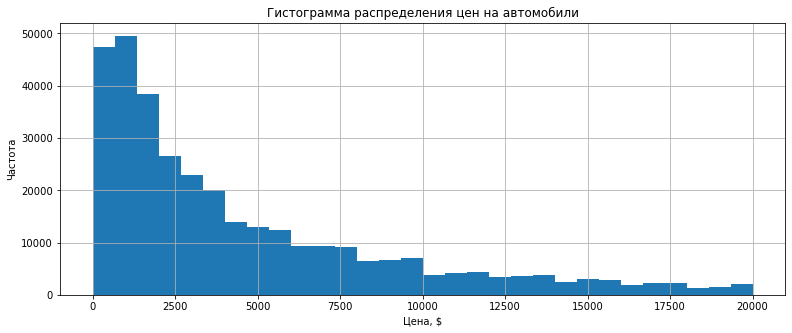

In [133]:
plt.figure(figsize=(13, 5))
plt.hist(data['Price'], bins=30)
plt.ylabel('Частота')
plt.xlabel('Цена, $')
plt.grid(True)
plt.title('Гистограмма распределения цен на автомобили')

Видим, что цена примерно половины всех автомобилей варьируется в пределах 0 - 2.500 тыс. $. Пик около нуля выглядит странным.

Объекты с аномальной ценой около нуля нужно отбросить. Такие объекты внесут лишний шум, потому как не отражают реальную стоимость автомобилей. Возможно, кто-то действительно готов продать свой автомобиль за бесценок, или, например, автомобиль после аварии/не на ходу/после пожара и т.д. Вариантов может быть масса, но в нашей задаче они не интересны. Тем более, такого параметра, который бы учитывал текущее состояние автомобиля или причину дешевизны у нас нет. Поэтому, возьмем в качестве минимальной границы стоимости авто 500$ и отбросим все что ниже:

In [134]:
print('Количество отброшенных объектов с ценой ниже 500$:', data.loc[data['Price'] < 500, 'Price'].count())
data = data.loc[data['Price'] >= 500]
data.head()

Количество отброшенных объектов с ценой ниже 500$: 31030


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,yes,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,33775
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,67112


Около 10% всех объектов попали оказались аномальными. Много. Но они только искажали суть.

---

Смотрим на аномалии в столбце *RegistrationYear*. 

Мы знаем, что эра современных автомобилей с ДВС началась примерно с 1900 года, и продолжается до сих пор. Оставим только те объявления, которые входят в этот промежуток:

In [135]:
print('Количество отброшенных объектов:', data.loc[(data['RegistrationYear'] < 1900) |
                                                   (data['RegistrationYear'] > 2019), 'Price'].count())
data = data.loc[~(data['RegistrationYear'] < 1900) | (data['RegistrationYear'] > 2019)]
data.head()

Количество отброшенных объектов: 46


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,yes,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,33775
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,67112


---

Смотрим на аномалии в столбце *Power*. 

Text(0.5, 0, 'Мощность, л.с.')

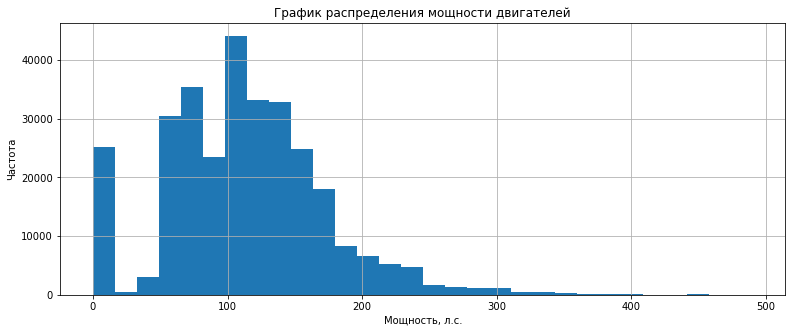

In [136]:
plt.figure(figsize=(13, 5))
plt.hist(data.loc[data['Power'] < 500, 'Power'], bins=30)
plt.grid(True)
plt.title('График распределения мощности двигателей')
plt.ylabel('Частота')
plt.xlabel('Мощность, л.с.')

Видим большое скопление объектов в районе 0. Обработаем их:

In [137]:
data.loc[data['Power'] == 0, 'Power'].count()

24997

Сгруппируем данные по моделям и бренду с тем, чтобы найти медианное значение мощности двигателя для каждого автомобиля. Этими значениями мы заполним нули в таблице:

In [138]:
data_with_power = data.groupby(['Brand', 'Model'])['Power'].median().reset_index()
data_with_power.head()

,Brand,Model,Power
0,alfa_romeo,145,103.0
1,alfa_romeo,147,120.0
2,alfa_romeo,156,150.0
3,alfa_romeo,159,170.0
4,alfa_romeo,other,150.0


Все объекты с отсутсвующей информацией о мощности двигателя сведем в отдельную таблицу

In [139]:
data_without_power = data.loc[data['Power'] == 0]
data_without_power.shape

(24997, 11)

In [140]:
data_without_power.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode
54,4700,wagon,2005,manual,0,signum,150000,petrol,opel,no,88433
55,550,wagon,1999,manual,0,astra,150000,gasoline,opel,yes,56759
69,1200,coupe,2001,manual,0,astra,150000,petrol,opel,yes,47249
70,800,small,1993,manual,0,polo,150000,petrol,volkswagen,no,8258
90,2400,sedan,2003,manual,0,a4,150000,gasoline,audi,yes,40210


Объединим две таблицы тем самым восстановив информацию о мощности двигателя для каждого автомобиля:

In [141]:
data_without_power = data_without_power.merge(
    data_with_power, on=['Brand', 'Model'], how='inner')

In [142]:
data_without_power.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power_x,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode,Power_y
0,4700,wagon,2005,manual,0,signum,150000,petrol,opel,no,88433,155.0
1,800,wagon,2003,manual,0,signum,150000,petrol,opel,no,48599,155.0
2,1890,wagon,2003,auto,0,signum,150000,gasoline,opel,no,72514,155.0
3,4950,wagon,2007,manual,0,signum,150000,gasoline,opel,yes,92363,155.0
4,4500,wagon,2003,manual,0,signum,80000,petrol,opel,no,91785,155.0


Отбросим нулевой столбец и переименум присоединенный столбец :

In [143]:
data_without_power = data_without_power.drop('Power_x', axis=1)

In [144]:
data_without_power = data_without_power.rename(columns={'Power_y': 'Power'})

In [145]:
data_without_power.head()

,Price,VehicleType,RegistrationYear,Gearbox,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode,Power
0,4700,wagon,2005,manual,signum,150000,petrol,opel,no,88433,155.0
1,800,wagon,2003,manual,signum,150000,petrol,opel,no,48599,155.0
2,1890,wagon,2003,auto,signum,150000,gasoline,opel,no,72514,155.0
3,4950,wagon,2007,manual,signum,150000,gasoline,opel,yes,92363,155.0
4,4500,wagon,2003,manual,signum,80000,petrol,opel,no,91785,155.0


In [146]:
data_without_power.shape

(24997, 11)

Выбросим из исходной таблицы объекты с нулевым значением мощности:

In [147]:
data = data.loc[data['Power'] != 0]

In [148]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,yes,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,33775
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,67112


Теперь сконкатенируем две таблицы и обновим индексы:

In [149]:
data = pd.concat([data, data_without_power], sort=False)

In [150]:
data = data.reset_index().drop('index', axis=1)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,PostalCode
0,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,yes,90480
1,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no,91074
2,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no,60437
3,650,sedan,1995,manual,102.0,3er,150000,petrol,bmw,yes,33775
4,2200,convertible,2004,manual,109.0,2_reihe,150000,petrol,peugeot,no,67112


Информация восстановлена. Не пришлось выбрасывать 30 тысяч объектов!

Теперь избавимся от аномалий в верхней границе Power:

Text(0.5, 1.0, 'Диаграмма размаха значений мощности двигателя')

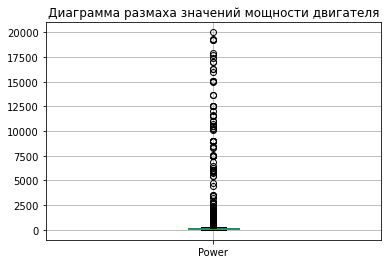

In [151]:
data.boxplot('Power')
plt.title('Диаграмма размаха значений мощности двигателя')

In [152]:
print('Количество аномальных объектов:', data.loc[data['Power'] >= 1000, 'Power'].count())

Количество аномальных объектов: 226


In [153]:
data = data.loc[data['Power'] <= 1000]

In [154]:
data.shape

(303398, 11)

---

Поиск аномалий в *RegistrationYear*

<AxesSubplot:title={'center':'Диаграмма размаха значений параметра "Год регистрации"'}>

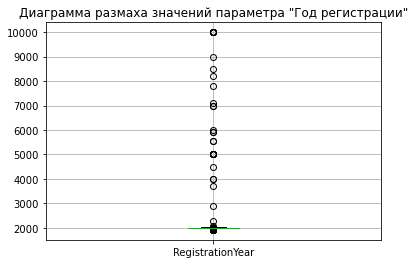

In [155]:
plt.title('Диаграмма размаха значений параметра "Год регистрации"')
data.boxplot('RegistrationYear')

Отлично. Видим несколько объектов, которые зарегестрированы позже текущего момента. Такого быть не может, потому отбросим такие аномалии:

In [156]:
print('Количетсво аномальных объектов:', data.loc[data['RegistrationYear'] > 2019,
                                                  'RegistrationYear'].count())

Количетсво аномальных объектов: 33


In [157]:
data = data.loc[data['RegistrationYear'] <= 2019]

In [158]:
data.shape

(303365, 11)

#### Предобработка категориальных признаков

Признаки *VehicleType*, *Gearbox*, *Model*, *FuelType*, *Brand* - преобразуем методом OHE:

In [159]:
data = pd.get_dummies(data, columns=['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand'], drop_first=True)

In [160]:
data.head()

,Price,RegistrationYear,Power,Kilometer,NotRepaired,PostalCode,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo
0,9800,2004,163.0,125000,yes,90480,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500,2001,75.0,150000,no,91074,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3600,2008,69.0,90000,no,60437,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,650,1995,102.0,150000,yes,33775,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2200,2004,109.0,150000,no,67112,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Столбец *NotRepaired* преобразуем в бинарный тип с 1 вместо *yes* и 0 вместо *no*:

In [161]:
data['NotRepaired'] = data['NotRepaired'].apply(lambda x: 1 if x == 'yes' else 0)

Признак *PostalCode*  содержит информацию о местонахождении продавца. С одной стороны, этот признак безусловно оказывает влияние на цену, но с другой, раздувать датафрейм в несколько десятков раз может быть нецелесообразно. Мы знаем, что большое количество признаков может привести к "ловушке размерности". Либо, вычислительная мощность может быть неоправданно высокой. Наша же цель - найти баланс между качеством и скоростью работы алгоритма. В связи с этим, отбросим пока столбец *PostalCode*.

In [162]:
data = data.drop('PostalCode', axis=1)

In [163]:
data.head()

,Price,RegistrationYear,Power,Kilometer,NotRepaired,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,...,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo
0,9800,2004,163.0,125000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500,2001,75.0,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3600,2008,69.0,90000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,650,1995,102.0,150000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2200,2004,109.0,150000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Нормирование количественных признаков

Предварительно разобьем данные на фичи и целевой признак, тренировочную и тестовую выборки:

In [164]:
features = data.drop('Price', axis=1)
target = data.Price

print('Размер признакового пространства:', features.shape)
print('Размер выборки целевого признака:', target.shape)

Размер признакового пространства: (303365, 305)
Размер выборки целевого признака: (303365,)


In [165]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.25,
                                                                            random_state=42)

In [166]:
print('Размеры выборок фичей: обучающей / тестовой:', features_train.shape, features_test.shape)
print('Размеры выборок целевого признака : обучающей / тестовой:', target_train.shape, target_test.shape)

Размеры выборок фичей: обучающей / тестовой: (227523, 305) (75842, 305)
Размеры выборок целевого признака : обучающей / тестовой: (227523,) (75842,)


Сохраним названия колонок с количественными признаками:

In [167]:
quantitative_cols = ['RegistrationYear', 'Power', 'Kilometer']

Напишем функцию нормирования:

In [168]:
def normalize(features, features_test, col_names):
    # обучаем модель нормирования на тренировочной выборке                                                                            
    scaler = StandardScaler()
    scaler.fit(features[col_names])
    
    # выключаем длинное предупреждение о копировании                                                                            
    pd.options.mode.chained_assignment = None

    # преобразовываем количественные признаки                                                                            
    features[col_names] = scaler.transform(features[col_names])
    features_test[col_names] = scaler.transform(features_test[col_names])

                                                                                
    return features, features_test

In [169]:
features_train, features_test = normalize(features_train, features_test, quantitative_cols)

In [170]:
print('Размеры выборок фичей: обучающей / тестовой:', features_train.shape, features_test.shape)

Размеры выборок фичей: обучающей / тестовой: (227523, 305) (75842, 305)


In [171]:
features_train.head()

,RegistrationYear,Power,Kilometer,NotRepaired,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo
271325,2.087625,0.915940,0.593034,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
113991,-0.661262,-0.876432,0.593034,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257494,0.785521,0.085789,-1.582620,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280409,-0.950619,0.349928,0.593034,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
194975,-0.516584,-0.593426,0.593034,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Вывод:

Данные предобработаны:

- Датафрейм почищен от пропущеных значений
- Данные избавлены от аномальных значений
- Категориальные признаки разбиты методом OHE
- Признаки "из будущего" выброшены из обучающего датафрейма
- Данные разбиты на выборки
- Количественные признаки нормированы

Можно переходить обучению моделей

## Обучение моделей

Построим несколько регрессионых моделей. Для каждой модели, по возможности подберем несколько наилучших гиперпараметров с помощью GridSearchCV.

Начнем обучение с построения модели градиентного бустинга из библиотеки LightGBM.

### Модель градиентного бустинга LightGBM

In [172]:
model = LGBMRegressor(random_state=42)

Зададим гиперпараметры для подбора:

In [173]:
params = {'num_leaves':range(100, 200, 50),
          'max_depth':range(2, 6, 2)}

In [174]:
clf = GridSearchCV(model, params, scoring='neg_mean_absolute_error', cv=3)

Обучим модель и измерим время выполнения этой операции

In [175]:
%%time
clf.fit(features_train, target_train)

CPU times: user 1min 11s, sys: 8.33 s, total: 1min 19s
Wall time: 33.5 s


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=42),
             param_grid={'max_depth': range(2, 6, 2),
                         'num_leaves': range(100, 200, 50)},
             scoring='neg_mean_absolute_error')

In [176]:
best_lgbm_model = clf.best_estimator_

### Модель линейной регрессии

Так как у линейной регрессии нет численных гиперпараметров для перебора, обучим модель прямо "из коробки":

In [177]:
lr_model = LinearRegression()

In [178]:
%%time
lr_model.fit(features_train, target_train)

CPU times: user 8.56 s, sys: 764 ms, total: 9.32 s
Wall time: 5.46 s


LinearRegression()

### Модель случайного леса

In [179]:
params_rf = {'n_estimators': range(5, 15, 5),
             'max_depth': range(2, 6, 2)}

In [180]:
rf_model = RandomForestRegressor(random_state=42)

In [181]:
clf = GridSearchCV(rf_model, params_rf, scoring='neg_mean_absolute_error', cv=3)

In [182]:
%%time
clf.fit(features_train, target_train)

CPU times: user 1min 22s, sys: 4.52 s, total: 1min 26s
Wall time: 1min 27s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(2, 6, 2),
                         'n_estimators': range(5, 15, 5)},
             scoring='neg_mean_absolute_error')

In [183]:
best_model = clf.best_estimator_

### Вывод:

Обучены 3 модели: градиентного бустинга, линеной регрессии и  случайного леса.

## Анализ моделей

Оценим качество и скорость работы моделей. Вычислим  **rmse score**:

### Анализ качества

In [184]:
prediction_lgbm = best_lgbm_model.predict(features_test)
prediction_lr = lr_model.predict(features_test)
prediction_rf = best_model.predict(features_test)
dummy_pred = pd.Series(target_train.mean(), index=target_test.index)

print('RMSE score LGBM: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, prediction_lgbm))))
print('RMSE score LinearRegression: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, prediction_lr))))
print('RMSE score RandomForestRegression: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, prediction_rf))))
print()
print('RMSE score DummyModel: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, dummy_pred))))

RMSE score LGBM: 1864.93
RMSE score LinearRegression: 2713.67
RMSE score RandomForestRegression: 2686.91

RMSE score DummyModel: 4558.75


Посмотрим наглядно, насколько хорошо/плохо *(нужное подчеркнуть)* моделям удалось понять спрятанные в данных закономерности:

In [185]:
def plot_two_lines(first_line, second_line, model_name):
    plt.figure(figsize=(12, 5))
    plt.plot(first_line[0:100], label=('Предсказания ' + model_name))
    plt.plot(second_line[0:100], label='Реальная цена')
    plt.title(f'Распределение реальных данных и предсказаний модели {model_name} на первых 100 объектах')
    plt.ylabel('Цена автомобиля, $')
    plt.xlabel('Индекс объекта')
    plt.legend()
    plt.show()

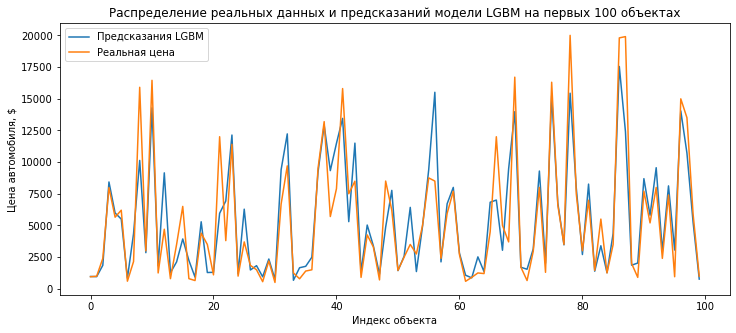

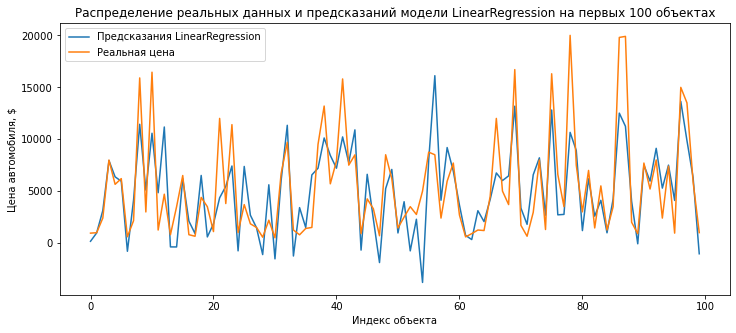

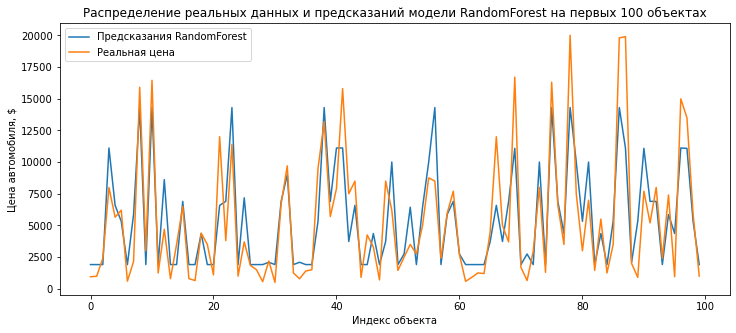

In [186]:
plot_two_lines(prediction_lgbm, 
               target_test.reset_index().drop('index', axis=1), 
               'LGBM')

plot_two_lines(prediction_lr, 
               target_test.reset_index().drop('index', axis=1), 
               'LinearRegression')

plot_two_lines(prediction_rf, 
               target_test.reset_index().drop('index', axis=1),
               'RandomForest')

**Вывод:** 

Наилучший результат показала модель LGBM. Наглядно видно, что ей лучше удается предсказывать цены. 

При этом, все модели прошли проверку на адекватность. Качество худшей модели LinearRegression практически в 2 раза лучше чем у Dummy модели.

### Анализ скорости работы

Оценим скорость обучения и скорость предсказания. Оценивать будем по wall time:

- Скорость обучения LGBM: **96 секунд** *(при переборе 2 гиперпараметров по 3 вариации в каждом)*
- Скорость обучения LinearRegression: **28 секунд** *(без пербора параметров)*
- Скорость обучения RandomForestRegressor: **88 секунд** *(при переборе 2 гиперпараметров по 3 вариации в каждом)*


In [187]:
%%time
best_lgbm_model.predict(features_test)

CPU times: user 998 ms, sys: 156 ms, total: 1.15 s
Wall time: 515 ms


array([  971.32311741,   956.28067028,  1853.08122016, ...,
       12152.28037495,  2656.47569441,  2361.74476877])

In [188]:
%%time
lr_model.predict(features_test)

CPU times: user 208 ms, sys: 107 ms, total: 315 ms
Wall time: 201 ms


array([  164.30934446,   972.85659615,  3126.19288028, ...,
       10007.15161367,  6056.59769965,  2541.16557139])

In [189]:
%%time
best_model.predict(features_test)

CPU times: user 263 ms, sys: 88.1 ms, total: 351 ms
Wall time: 241 ms


array([ 1909.9759448 ,  1909.9759448 ,  1909.9759448 , ...,
       14300.77082186,  1909.9759448 ,  2743.48083576])

**Вывод:** 

Быстрее всего обучается модель линейной регрессии. Имеем в виду, что подбора оптимальных параметров не происходит.  
Вследствие этого, как мы убедились, модель сильно теряет в качестве. 

Сравнимые результаты показали модели LGBM и RandomForestRegressor. Разница в 8 секунд, при этом, качество "деревянных" моделей сильно отстает от градиентного бустинга, и сравнимо с моделью линейной регрессии. Таким образом, использование модели RFR нецелесообразно, так как скорость ее работы сильно выше минимальной, а качество работы сильно хуже чем у лучшей модели. 

Возможно, стоит подобрать более оптимальные параметры на которых модели RFR покажут лучший score.

Скорость предсказания самая высокая у линейной регрессии. Очень близка скорость и у RFR. Градиентный бустинг предсказывает дольше всего, примерно в 7 раз дольше линейной регрессии.

## Вывод:

Проведено исследование скорости и качества работы трех регрессионных моделей. По его результатам выяснено, что:

- **Лучшую скорость** обучения и предсказания показывает модель **линейной регрессии**, при этом имея худшее качество из трех моделей.
- **Лучшее качество** у модели **градиентного бустинга LGBM**. Качество примерно на 30% лучше, чем у других регрессоров. Но, LGBM имеет худшее время работы, в 3 раза бОльшее чем у быстрой линейной регрессии.
- **RandomForest имеет посредственные результаты**. Время работы сравнимое с худшим у LGBM и качество сравнимое с худшим у LinearRegression. Ее использование нецелесообразно. 

Таким образом, нам приходится выбирать "меньшее из зол". Для понимания того, какую из моделей стоит рекомендовать к внедрению, нужно разобраться с тем, что заказчику важнее - скорость или качество. Смею предположить, что в онлайн-сервисе по продаже автомобилей - скорость отклика ресурса - будет важнее, чем точность рекомендованной цены продажи авто. Автовладельцы чаще всего представляют, примерную стоимость своего железного коня. И рекомендательная система - это скорее приятный бонус, нежели жизненная необходимость. Поэтому, для целей заказчика я рекомендую воспользоваться быстродействующим алгоритмом линейной регрессии. Модель этого типа обучается в 3 раза быстрее LGBM, а качество имеет примерно на 30% хуже. При этом, ей все же удается неплохо отлавливать закономерности.

Не исключено, что существуют такие гиперпараметры LGBM, при которых модель имеет меньшее время обучения, сравнимое с линейной регрессией. Тогда, однозначно, такая модель была бы лучшим решением для построения рекомендательной системы.